<a href="https://colab.research.google.com/github/cuixx289/STAT-6289_Homework/blob/master/Mingyang%20Cui_STAT6289_HW3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping


In [43]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab_Notebooks/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [44]:
df= pd.read_csv(abspath_curr + 'TSLA.csv',
                           header=0)
print('Number of rows and columns:', df.shape)
df.head(5)

Number of rows and columns: (1328, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-09,51.816002,52.590000,51.358002,51.584000,51.584000,16670500
1,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
2,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
3,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
4,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000


# Split the data into training and test sets

In [45]:
training_set = df.iloc[:800, 1:2].values
test_set = df.iloc[800:, 1:2].values

# Lag of 1 day (lag 1):

In [46]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

# LSTM with 50 neurons and 4 hidden layers.Dropout rate = 0.2, batch size = 32

In [7]:
model0 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model0.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model0.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model0.add(LSTM(units = 50, return_sequences = True))
model0.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model0.add(LSTM(units = 50, return_sequences = True))
model0.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model0.add(LSTM(units = 50))
model0.add(Dropout(0.2))
# Adding the output layer
model0.add(Dense(units = 1))

# Compiling the RNN
model0.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
m0 = model0.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 92ms/step - loss: 0.0643
Epoch 2/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0169
Epoch 3/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0130
Epoch 4/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0145
Epoch 5/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0142
Epoch 6/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0119
Epoch 7/100
24/24 [==============================] - 2s 96ms/step - loss: 0.0128
Epoch 8/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0128
Epoch 9/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0115
Epoch 10/100
24/24 [==============================] - 3s 108ms/step - loss: 0.0109
Epoch 11/100
24/24 [==============================] - 3s 109ms/step - loss: 0.0097
Epoch 12/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0106
Epoch 13/100
24/24 [

# LSTM with 50 neurons and 6 hidden layers. Dropout = 0.2, batch size = 32

In [49]:
model1 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model1.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50, return_sequences = True))
model1.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model1.add(LSTM(units = 50))
model1.add(Dropout(0.2))
# Adding the output layer
model1.add(Dense(units = 1))

# Compiling the RNN
model1.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
m1 = model1.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 4s 152ms/step - loss: 0.0771
Epoch 2/100
24/24 [==============================] - 4s 151ms/step - loss: 0.0204
Epoch 3/100
24/24 [==============================] - 4s 155ms/step - loss: 0.0166
Epoch 4/100
24/24 [==============================] - 4s 154ms/step - loss: 0.0144
Epoch 5/100
24/24 [==============================] - 4s 148ms/step - loss: 0.0145
Epoch 6/100
24/24 [==============================] - 4s 149ms/step - loss: 0.0143
Epoch 7/100
24/24 [==============================] - 4s 147ms/step - loss: 0.0140
Epoch 8/100
24/24 [==============================] - 4s 151ms/step - loss: 0.0140
Epoch 9/100
24/24 [==============================] - 4s 152ms/step - loss: 0.0142
Epoch 10/100
24/24 [==============================] - 4s 161ms/step - loss: 0.0142
Epoch 11/100
24/24 [==============================] - 4s 153ms/step - loss: 0.0123
Epoch 12/100
24/24 [==============================] - 4s 154ms/step - loss: 0.0126
Epoch 13/100


# 4 layers, try dropout rate = 0.5, batch size = 32

In [50]:
model2 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model2.add(Dropout(0.5))
# Adding a second LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.5))
# Adding a third LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50, return_sequences = True))
model2.add(Dropout(0.5))
# Adding a fourth LSTM layer and some Dropout regularisation
model2.add(LSTM(units = 50))
model2.add(Dropout(0.5))
# Adding the output layer
model2.add(Dense(units = 1))

# Compiling the RNN
model2.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
m2 = model2.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
24/24 [==============================] - 2s 93ms/step - loss: 0.0815
Epoch 2/100
24/24 [==============================] - 2s 102ms/step - loss: 0.0275
Epoch 3/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0220
Epoch 4/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0196
Epoch 5/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0196
Epoch 6/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0187
Epoch 7/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0191
Epoch 8/100
24/24 [==============================] - 2s 97ms/step - loss: 0.0176
Epoch 9/100
24/24 [==============================] - 2s 101ms/step - loss: 0.0164
Epoch 10/100
24/24 [==============================] - 2s 101ms/step - loss: 0.0170
Epoch 11/100
24/24 [==============================] - 2s 100ms/step - loss: 0.0196
Epoch 12/100
24/24 [==============================] - 2s 98ms/step - loss: 0.0180
Epoch 13/100
24/24 [=

# 4 layers, Dropout = 0.2, Change the batch size to 64

In [51]:
model3 = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model3.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))
# Adding a third LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50, return_sequences = True))
model3.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
model3.add(LSTM(units = 50))
model3.add(Dropout(0.2))
# Adding the output layer
model3.add(Dense(units = 1))

# Compiling the RNN
model3.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
m3 = model3.fit(X_train, y_train, epochs = 100, batch_size = 64)

Epoch 1/100
12/12 [==============================] - 1s 118ms/step - loss: 0.1383
Epoch 2/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0311
Epoch 3/100
12/12 [==============================] - 2s 127ms/step - loss: 0.0208
Epoch 4/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0158
Epoch 5/100
12/12 [==============================] - 1s 123ms/step - loss: 0.0133
Epoch 6/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0130
Epoch 7/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0135
Epoch 8/100
12/12 [==============================] - 2s 125ms/step - loss: 0.0116
Epoch 9/100
12/12 [==============================] - 1s 122ms/step - loss: 0.0107
Epoch 10/100
12/12 [==============================] - 1s 118ms/step - loss: 0.0106
Epoch 11/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0120
Epoch 12/100
12/12 [==============================] - 1s 117ms/step - loss: 0.0111
Epoch 13/100


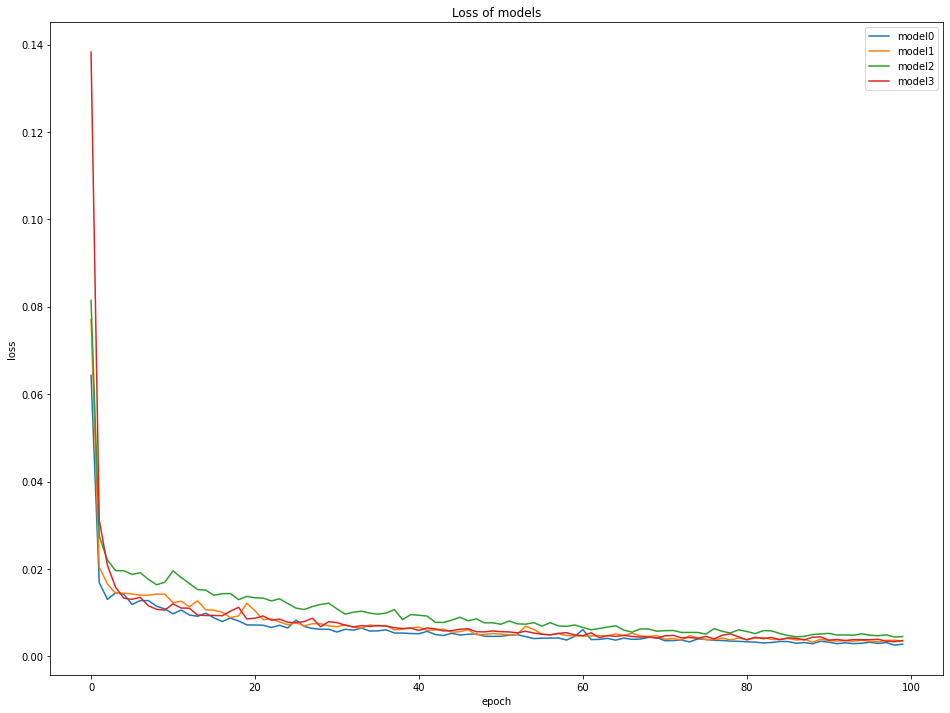

In [53]:
#plotting graphs for Loss 
import matplotlib.pyplot as plt

plt.plot(m0.history['loss'])
plt.plot(m1.history['loss'])
plt.plot(m2.history['loss'])
plt.plot(m3.history['loss'])
plt.title('Loss of models')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['model0','model1'
            ,'model2','model3',
           'model'], loc='upper right')
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.savefig('')
plt.show()

From the loss plot above, we can conclude that the blue line works better than the other 4 to reduce the loss (mean square error). So we choose the LSTM with 4 layers, dropout = 0.2 and batch size = 32 as our final model to predict the result

# Prepare the test data (reshape them):

In [61]:
# Getting the predicted stock price of 2020
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 588):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(528, 60, 1)


# Make Predictions using the test set

In [70]:
predicted_stock_price = model0.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Let’s visualize the results for time lag = 1 day:

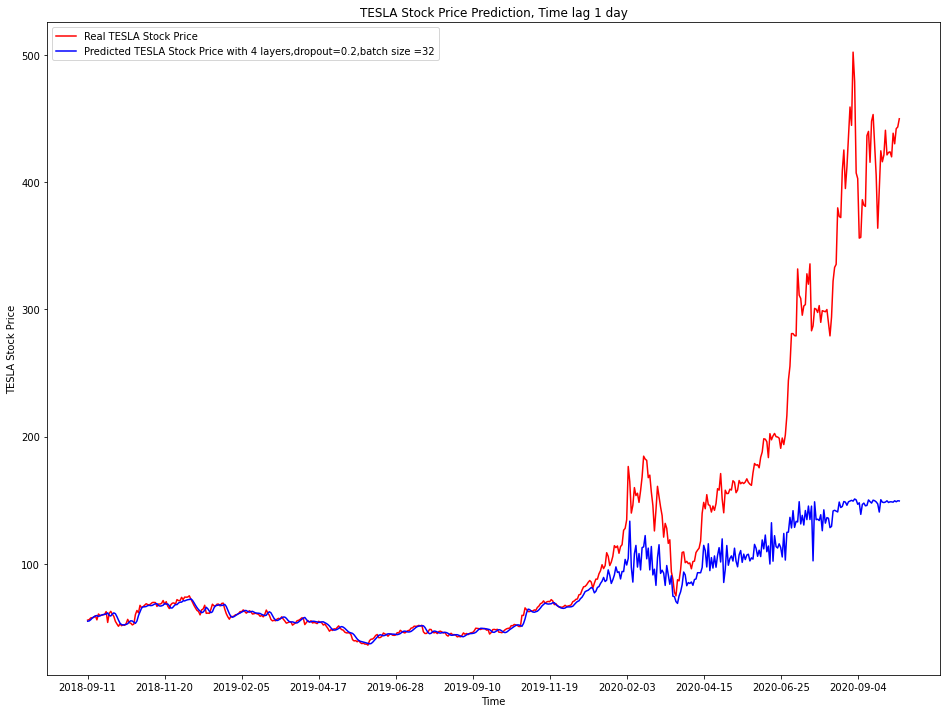

In [71]:
# Visualising the results for 1 day.
plt.plot(df.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 layers,dropout=0.2,batch size =32')
plt.xticks(np.arange(0,528,50))
plt.title('TESLA Stock Price Prediction, Time lag 1 day')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Build the input features with different time lags, 7 days. 

In [14]:

X_train = []
y_train = []
for i in range(60, 800,7):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588,7):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model0.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


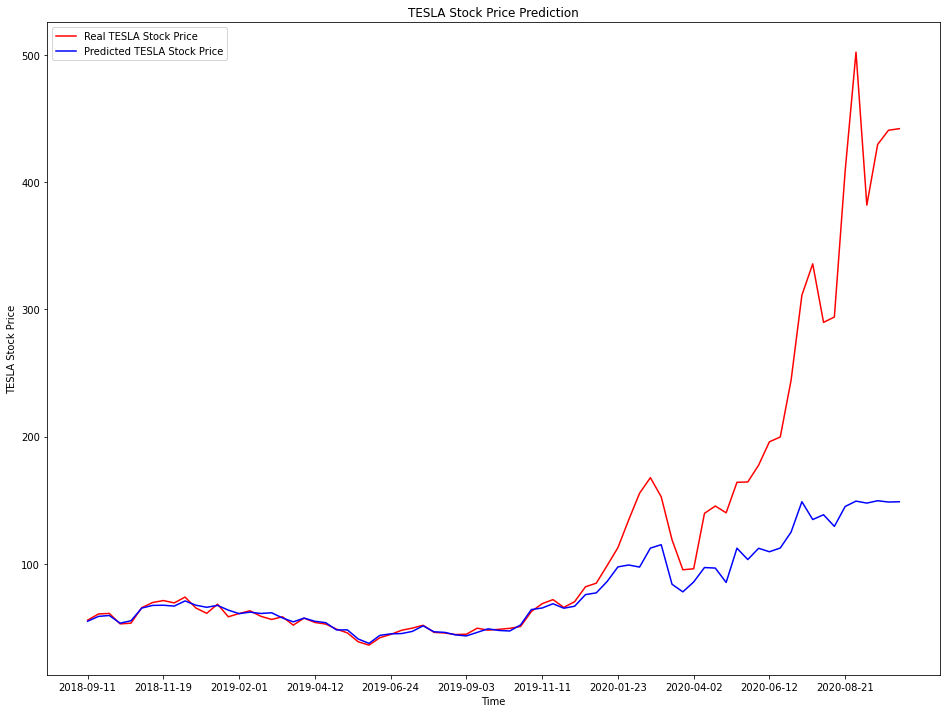

In [16]:
# Visualising the results
plt.plot(df.loc[800::7, 'Date'],dataset_test.values[::7], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 layers,dropout=0.2,batch size =32')
plt.xticks(np.arange(0,76,7))
plt.title('TESLA Stock Price Prediction, Time lag 7 days')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.legend()
plt.show()

# Build the input features with 14 days lag.

In [81]:
X_train = []
y_train = []
for i in range(60, 800,14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588,14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = model0.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

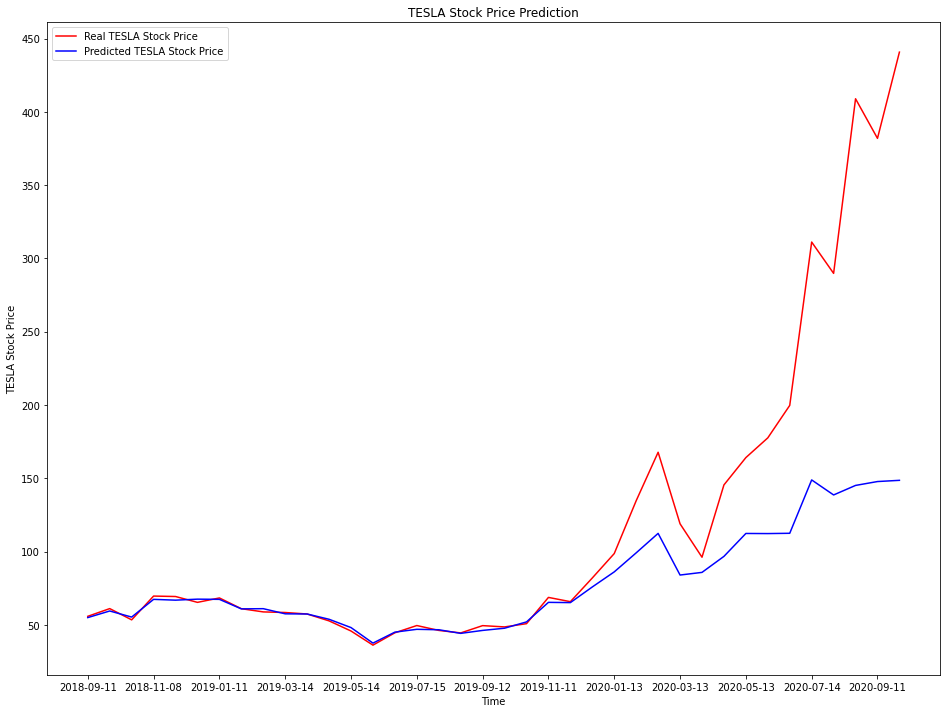

In [82]:
# Visualising the results
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Compare 4 layers vs 6 layers model with 14 days lag 

In [89]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_1 = model1.predict(X_test)
predicted_stock_price_1 = sc.inverse_transform(predicted_stock_price_1)

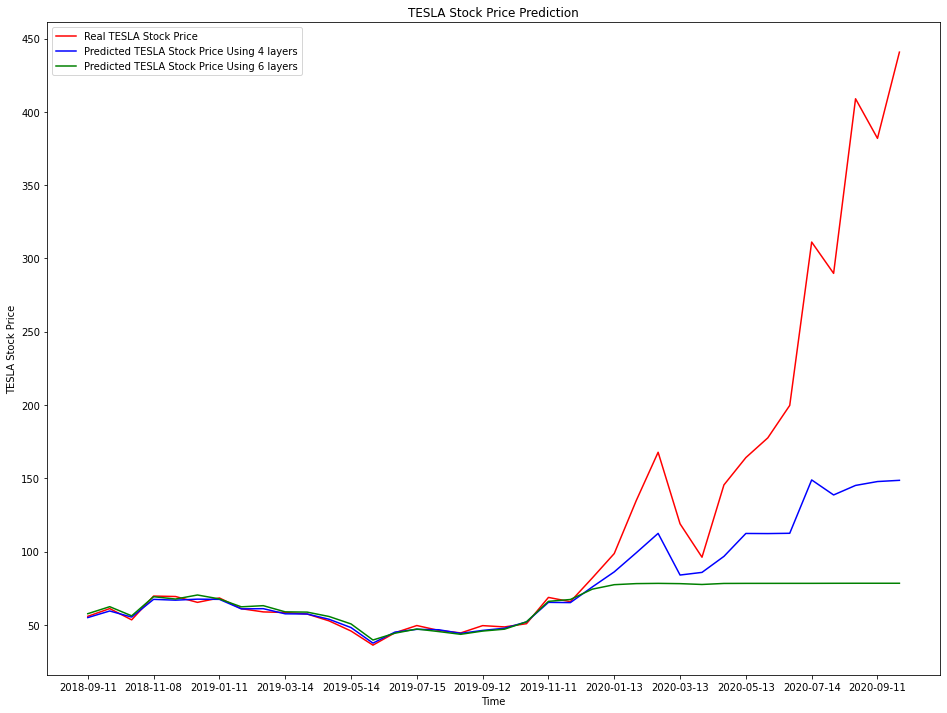

In [90]:
# Visualising the results
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price Using 4 layers')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price_1, color = 'green',
         label = 'Predicted TESLA Stock Price Using 6 layers')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Compare 4 layers, dropout = 0.2 vs 0.5 with 14 days lag

In [91]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_2 = model2.predict(X_test)
predicted_stock_price_2 = sc.inverse_transform(predicted_stock_price_2)

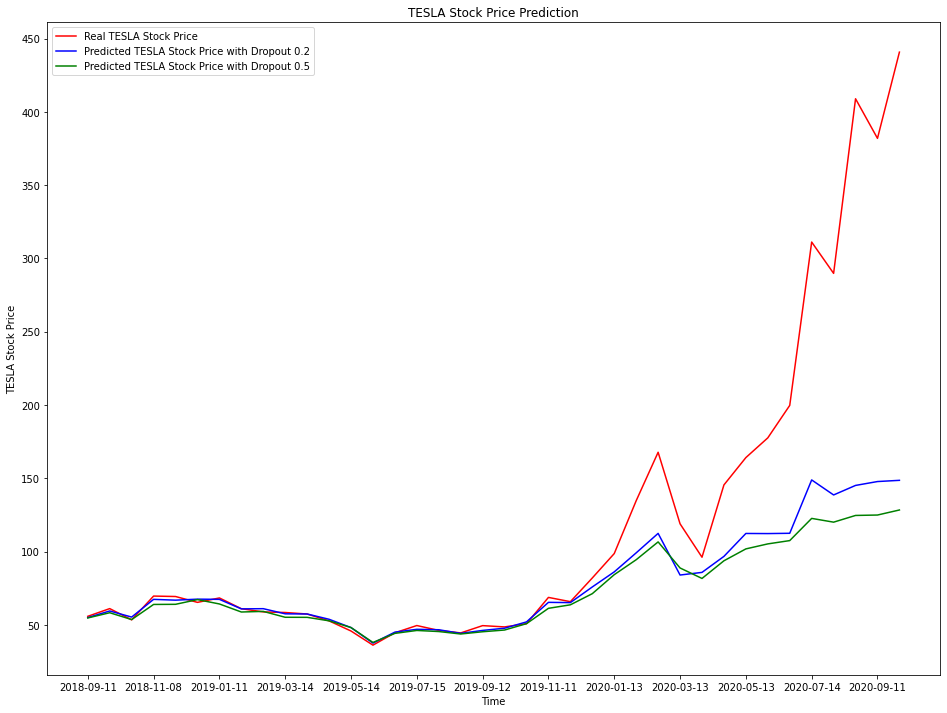

In [93]:
# Visualising the results
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price with Dropout 0.2')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price_2, color = 'green',
         label = 'Predicted TESLA Stock Price with Dropout 0.5')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Compare 4 layers, batch size = 32 vs 64 with 14 days lag

In [94]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800, 14):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])

X_test = []
y_test = []
for i in range(60, 588, 14):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price_3 = model3.predict(X_test)
predicted_stock_price_3 = sc.inverse_transform(predicted_stock_price_3)

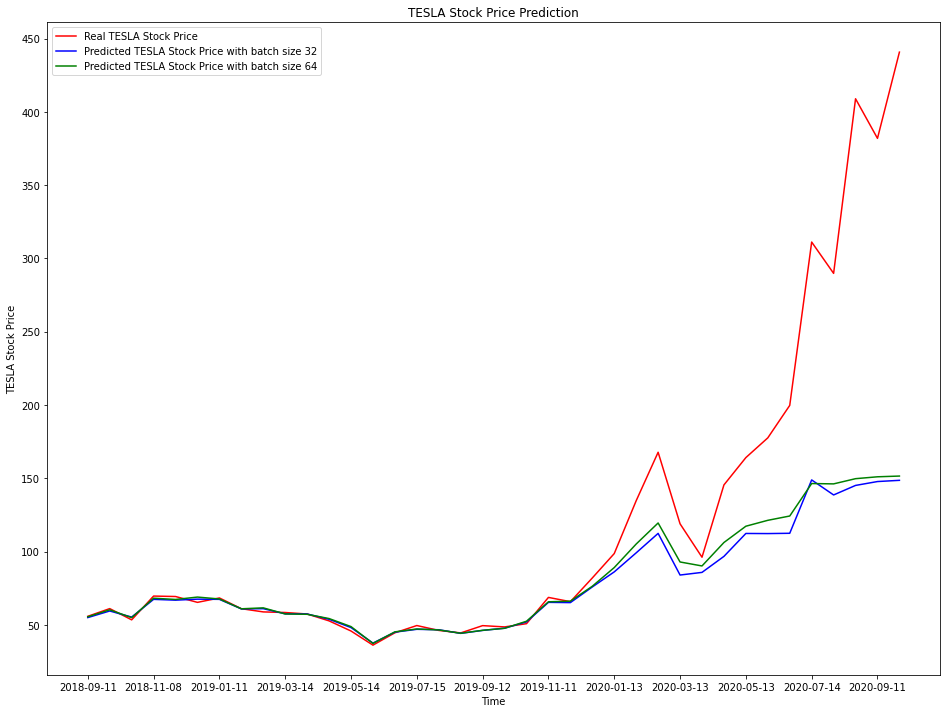

In [95]:
# Visualising the results
plt.plot(df.loc[800::14, 'Date'],dataset_test.values[::14], color = 'red',
         label = 'Real TESLA Stock Price')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price, color = 'blue',
         label = 'Predicted TESLA Stock Price with batch size 32')
plt.plot(df.loc[800::14, 'Date'],predicted_stock_price_3, color = 'green',
         label = 'Predicted TESLA Stock Price with batch size 64')
plt.xticks(np.arange(0,38,3))
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()

# Predictions for future 2 weeks

In [96]:
## predict price in two weeks
# calculate date difference
from datetime import datetime
cur_day = datetime(2020, 10, 14)
end_day = datetime(2020, 10, 28)
time_diff = (end_day - cur_day).days

In [97]:
# get the date of following two weeks
dates = df['Date']
last_date = '2020-10-15'
timestamp_list = pd.date_range(last_date, periods = time_diff).tolist()
datestring_list = [i.strftime("%Y-%m-%d") for i in timestamp_list] 

In [98]:
# delete weekends
index = [2,3,9,10]
to_del = object()
for ind in index:
    datestring_list[ind] = to_del
for i in index:
    datestring_list.remove(to_del)

In [99]:
# Getting the predicted stock price of 2020
dataset_train = df.iloc[:800, 1:2]
dataset_test = df.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
#get the test data
for i in range(60, 538):
    X_test.append(inputs[i-60:i, 0])

# X_test.shape[0] has 478 values, we want use the last 10 value to predict 
del X_test[0:468]
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)

(10, 60, 1)


In [103]:
predicted_stock_price = model0.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)
predicted_stock_price2 = model2.predict(X_test)
predicted_stock_price2 = sc.inverse_transform(predicted_stock_price2)
predicted_stock_price3 = model3.predict(X_test)
predicted_stock_price3 = sc.inverse_transform(predicted_stock_price3)

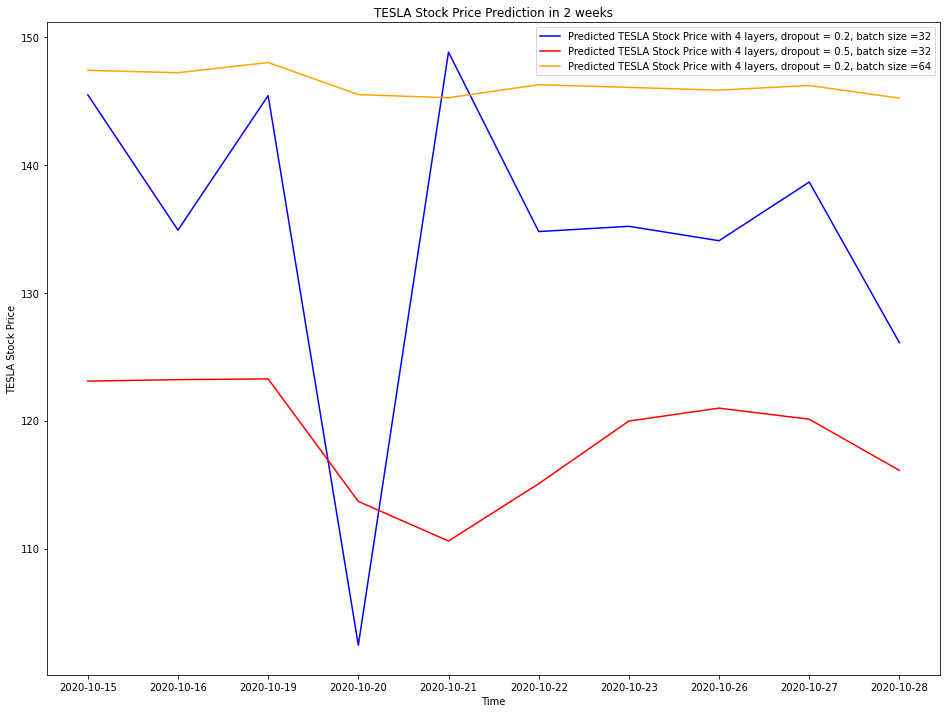

In [105]:
# Visualising the results
plt.plot(datestring_list,predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price with 4 layers, dropout = 0.2, batch size =32')
plt.plot(datestring_list,predicted_stock_price2, color = 'red', label = 'Predicted TESLA Stock Price with 4 layers, dropout = 0.5, batch size =32')
plt.plot(datestring_list,predicted_stock_price3, color = 'orange', label = 'Predicted TESLA Stock Price with 4 layers, dropout = 0.2, batch size =64')
plt.xticks(np.arange(0,10))
plt.title('TESLA Stock Price Prediction in 2 weeks')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
figure = plt.gcf()
figure.set_size_inches(16,12)
plt.show()